<a href="https://colab.research.google.com/github/adeepH/DravidianOffensive/blob/main/Notebooks/Transliterated/Kannada/mBERT_cased%2BbiLSTM_Kannada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers==3.3.1

     |████████████████████████████████| 1.1MB 13.5MB/s 
     |████████████████████████████████| 1.2MB 52.9MB/s 
     |████████████████████████████████| 901kB 37.0MB/s 
     |████████████████████████████████| 3.0MB 52.4MB/s 


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [3]:
train=pd.read_csv('/content/Trans_kan_train.csv')
train['labels']=LabelEncoder().fit_transform(train['label'])
train['tweets']=train['transliterated']
for i in range(len(train)):
  train['tweets'][i]=train['tweets'][i][8:-2]
train=train.drop(columns=['label','Unnamed: 0','transliterated','Sentence'])
train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,labels,tweets
0,0,ಟಿಕ್ ಟೋಕ್ ಅಲ್ಲಿ ಜಗಳ ಮಾಡ್ತಿದ್ರಲ್ಲ ಅದ್ರ ಬಗ್ಗೆನೂ ...
1,5,ಆನ್ಯೋನ್ ಫ್ರಮ್ ಕೇರಳ ಹೀರೆ
2,0,ಮೂವಿ ರೀರಿಲೀಸ್ ಮಾಡಿ ಪಿಲ್ಸ್
3,0,ಅಮೇಜಾನ್ ಪ್ರೈಮ್ ಅಲ್ಲಿ ಬಿಟ್ಟಿದಿರ....ಎಲ್ಲಾ ಮನೆಲೆ ...
4,0,ಗುರು ಸೂರೆ ನ್ಯೂಸ್ ನಾನು ಟಿಕ್ ಟೋಕ್ ಡಾನ್ ಲೋಡ್ ಮಡೆದ...
...,...,...
6212,2,@ಗಜೇಂದ್ರ ಹ್ಯೂ ನೀನ್ ಏನ್ ಮಾಡಿರೊದು ಮೇಲೆ
6213,0,ಸಾರ್ ನೀವ್ ಅತ್ತಿದ್ದ ಗೇಮ್ ಯಾವ್ದು
6214,0,ಡಬ್ಬ್ ಫುಲ್ ಮೂವಿ ಇನ್ ತೆಲುಗು
6215,0,ಮೊಸ್ಟಿ ನಿಮ್ಮ ಮಾತೆ ಕೇಳಿ ಟಿಕ್ ಟೋಕ್ ಬ್ಯಾನ್ ಆಗಿರ್ಬ...


In [4]:
val=pd.read_csv('/content/Trans_kan_test.csv')
val['labels']=LabelEncoder().fit_transform(val['label'])
val['tweets']=val['transliterated']
for i in range(len(val)):
  val['tweets'][i]=val['tweets'][i][8:-2]
val=val.drop(columns=['label','Unnamed: 0','transliterated','Sentence'])
val

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,labels,tweets
0,1,ಜೈ ಮೋರಿ ಜೈ ರೋಗಿ ಇಸ್ಲಾಂ ಸಾಯಿಸಿ ಇದೆ ಇವರ ಗುರಿ
1,1,ಅನ್ನಾ ನಿಮ್ ಏ ವೀಡಿಯೋ ನೋಡಿನೂ ಮಾತೆ ಚೈನಾ ಅಪ್ಸ್ ಯೂಸ...
2,0,ಸೂಪರ್ ಅನ್ನಾ ಏನು ತಪ್ಪಿಲ ಎಲ್ಯ ಸಾರಿ ಆಗಿ ಹೇಳ್ಳಿದಿರ...
3,5,ಸೂಪರ್ ಸಾರ್ ಸೂಪರ್ ಸೂಪರ್ ಸೂಪರ್ ಸೂಪರ್
4,5,ಆಗ್ಟ್-ಕೇಲು (ಕನ್ನಡ ರಫ್ 2019)
...,...,...
773,0,ಸ್ಟರ್ಟಿಪ್ ಸ್ಟಾರ್ಟ್ ಮಾಡಲು ಕ್ಯಾಪಿಟಿ ಗ್ರೌತ್ ಮಾಡಲು...
774,2,ರಶ್ಮಿಕ ಇದನ್ನ ನೋಡಿ ಥಿ*ಏ ಊರ್ಕಿಂಬೇಕು🤣🤣🤣🤣🤣
775,5,ಈ ಲವ್ ಯುಎ ಸಾರ್
776,0,ನೋಡ್ತಾ ಹೋದ್ರೆ ಸಾವಿರಾರು ಲಿರಿಕಲ್ ವೀಡಿಯೋ ಗಳು


In [5]:

import pandas as pd
from torch.utils.data import Dataset,DataLoader

class RFDataset(Dataset):
  def __init__(self,text,label,tokenizer,max_len):
    self.text = text
    self.label = label
    self.tokenizer = tokenizer
    self.max_len = max_len
  
  def __len__(self):
    return len(self.text)
  
  def __getitem__(self,item):
    text = str(self.text[item])
    label = self.label[item]

    encoding = self.tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length = self.max_len,
        return_token_type_ids = False,
        padding = 'max_length',
        return_attention_mask= True,
        return_tensors='pt',
        truncation=True
    )

    return {
        'text' : text,
        'input_ids' : encoding['input_ids'].flatten(),
        'attention_mask' : encoding['attention_mask'].flatten(),
        'label' : torch.tensor(label,dtype=torch.long)

    }

In [6]:
 
print('Training set size:',train.shape)
#Uncomment the next line when we have the test data
#print('Testing set size:',test.shape)
print('validation set size:',val.shape)

Training set size: (6217, 2)
validation set size: (778, 2)


In [7]:
import numpy as np

from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                  np.unique(train.labels.values),
                                                  train.labels.values)
class_weights

array([0.29237208, 3.14944276, 2.12765229, 8.42411924, 4.88757862,
       0.68079282])

In [8]:

def create_data_loader(df,tokenizer,max_len,batch_size):
  ds = RFDataset(
      text = df.tweets.to_numpy(),
      label = df.labels.to_numpy(),
      tokenizer = tokenizer,
      max_len = max_len
  )

  return DataLoader(ds,
                    batch_size = batch_size,
                    shuffle = True,
                    num_workers=4)

In [9]:
from transformers import XLNetTokenizer,XLNetModel,AdamW,get_linear_schedule_with_warmup,AutoModel,AutoTokenizer
device = 'cuda'
PRE_TRAINED_MODEL_NAME = 'bert-base-multilingual-cased'
tokenizer = AutoTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)


In [10]:
BATCH_SIZE = 32
MAX_LEN = 128
train_data_loader = create_data_loader(train,tokenizer,MAX_LEN,BATCH_SIZE)
val_data_loader = create_data_loader(val,tokenizer,MAX_LEN,BATCH_SIZE)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [11]:
BERT_model = AutoModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

In [12]:
import torch
import torch.nn as nn
class RFClassifier(nn.Module):
  def __init__(self, n_classes):
    super(RFClassifier, self).__init__()
    self.auto = AutoModel.from_pretrained('bert-base-multilingual-cased')
    self.lstm = nn.LSTM(768, 256, batch_first=True,bidirectional=True)
    self.linear = nn.Linear(256*2, 128)
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(0.4)
    self.out = nn.Linear(128, n_classes)
  
  def forward(self, input_ids, attention_mask):
    sequence_output, pooled_output = self.auto(input_ids, 
               attention_mask=attention_mask)

    # sequence_output has the following shape: (batch_size, sequence_length, 768)
    lstm_output, (h,c) = self.lstm(sequence_output) ## extract the 1st token's embeddings
    hidden = torch.cat((lstm_output[:,-1, :256],lstm_output[:,0, 256:]),dim=-1)
    linear_output = self.linear(lstm_output[:,-1].view(-1,256*2)) ### assuming that you are only using the output of the last LSTM cell to perform classification

    return linear_output

In [13]:
model = RFClassifier(6)
model = model.to(device)

In [14]:
EPOCHS = 5
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

In [15]:

def train_epoch(model,data_loader,loss_fn,optimizer,device,scheduler,n_examples):
    model = model.train()
    losses = []
    correct_predictions = 0

    for data in data_loader:
        input_ids = data['input_ids'].to(device)
        attention_mask = data['attention_mask'].to(device)
        labels = data['label'].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
            )
        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs,labels)

        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    return correct_predictions.double() / n_examples, np.mean(losses)

In [16]:

def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()
  losses = []
  correct_predictions = 0
  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      labels = d["label"].to(device)
      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)
      loss = loss_fn(outputs, labels)
      correct_predictions += torch.sum(preds == labels)
      losses.append(loss.item())
  return correct_predictions.double() / n_examples, np.mean(losses)

In [17]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [18]:
from collections import defaultdict
import torch
 
history = defaultdict(list)
best_accuracy = 0
for epoch in range(EPOCHS):
 
 
  start_time = time.time()
  train_acc,train_loss = train_epoch(
      model,
      train_data_loader,
      loss_fn,
      optimizer,
      device,
      scheduler,
      len(train)
  )
   
  
  val_acc,val_loss = eval_model(
      model,
      val_data_loader,
      loss_fn,
      device,
      len(val)
  )
  
  end_time = time.time()
  epoch_mins, epoch_secs = epoch_time(start_time, end_time)
  print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
  print(f'Train Loss {train_loss} accuracy {train_acc}')
  print(f'Val Loss {val_loss} accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(),'bert-base-multilingual-uncased.bin')
    best_accuracy = val_acc

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: 01 | Epoch Time: 2m 43s
Train Loss 1.2773285893293527 accuracy 0.6405018497667686
Val Loss 1.0187017273902894 accuracy 0.6465295629820051

Epoch: 02 | Epoch Time: 2m 49s
Train Loss 0.9290831567385258 accuracy 0.6911693742962844
Val Loss 0.8997142171859741 accuracy 0.7082262210796915

Epoch: 03 | Epoch Time: 2m 49s
Train Loss 0.8149412314097086 accuracy 0.7395850088467106
Val Loss 0.8631102442741394 accuracy 0.7262210796915166

Epoch: 04 | Epoch Time: 2m 49s
Train Loss 0.7256227404643327 accuracy 0.7653208943220203
Val Loss 0.8430799722671509 accuracy 0.7313624678663239

Epoch: 05 | Epoch Time: 2m 49s
Train Loss 0.6771754134923984 accuracy 0.782370918449413
Val Loss 0.815206824541092 accuracy 0.7352185089974292



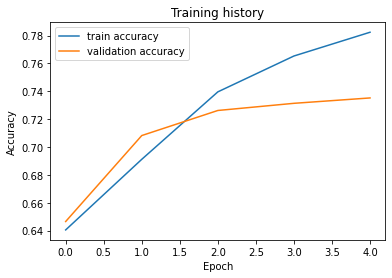

In [19]:
import matplotlib.pyplot as plt
plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
#plt.ylim([0, 1]);

In [20]:
val_acc, _ = eval_model(
  model,
  val_data_loader,
  loss_fn,
  device,
  len(val) #Change it to test when you have the test results
)
val_acc.item()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


0.7352185089974292

In [21]:
def get_predictions(model, data_loader):
  model = model.eval()
  sentence = []
  predictions = []
  prediction_probs = []
  real_values = []
  with torch.no_grad():
    for d in data_loader:
      texts = d["text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      labels = d["label"].to(device)
      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)
      sentence.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(outputs)
      real_values.extend(labels)
  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return sentence, predictions, prediction_probs, real_values

In [22]:

y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
  model,
  val_data_loader
)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [23]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       427
           1       0.35      0.14      0.20        44
           2       0.67      0.68      0.68        75
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00        33
           5       0.70      0.91      0.79       185

    accuracy                           0.74       778
   macro avg       0.42      0.42      0.41       778
weighted avg       0.68      0.74      0.70       778

